In [37]:
import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import copy
from skimage import exposure
import copy
from scipy import signal
%matplotlib inline

C:\Users\flaco\AppData\Local\Temp\ipykernel_2332\3149965928.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cameraman_origin = imageio.imread('eco.tif')


shape: (512, 672)
dtype: uint16


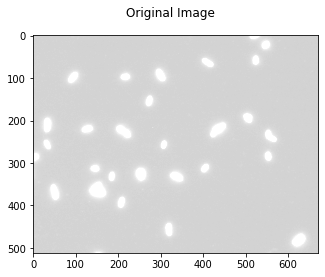

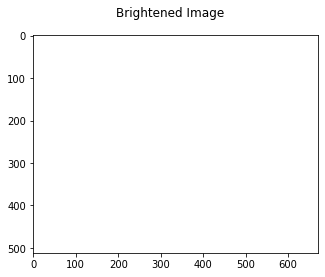

In [38]:
# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    print("shape: {}".format(pic.shape))
    print("dtype: {}".format(pic.dtype))
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            pic[i][j] += brightness
    return pic

# Read the image
cameraman_origin = imageio.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright = copy.deepcopy(cameraman_origin)

# Call imadd to perform enhancement
cameraman_bright = imadd(cameraman_bright,50)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('Brightened Image')
plt.imshow(cameraman_bright,cmap='gray',vmin = 0, vmax = 255)
plt.show()

#### What is the dynamic range (the number of distinct pixel values in an image) of the original and the enhanced image?
The dynamic range is a value from 0 to 255 for the cameraman.tif. 

#### What will happen if we increase brightness by 300?
For the cameraman image, increasing the brightness by 50 and 300 had very similar effects. The image became overall brighter. For eco.tif, the original image is already fairly bright. Increasing by 50 or 300 made the image completely white.


#### Could you enhance the quality of the image eco.tif by simply increasing its brightness?
No you cannot since the image is already bright. 

C:\Users\flaco\AppData\Local\Temp\ipykernel_2332\2586617497.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  eco_origin = imageio.imread('eco.tif')


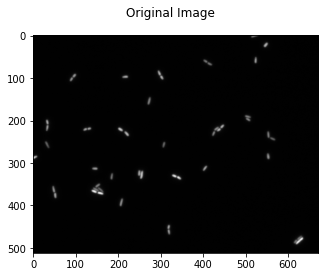

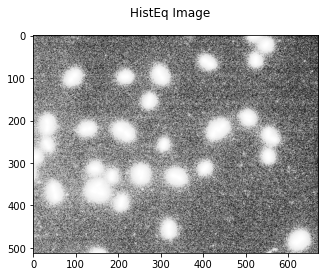

In [39]:
# Read the image
eco_origin = imageio.imread('eco.tif')

# Apply Histogram Equalization here!
eco_histeq = exposure.equalize_hist(eco_origin, mask=None)
# eco_histeq = exposure.equalize_hist(eco_histeq, mask=None)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray')
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.show()

#### Can you improve the result of enhancement by repeating the histogram equalization? Why?
You cannot improve the results by repeating the equalization. This is because histogram equalization distrubutes high intensity areas. Once it has been performed, pixel intensities are no longer clustered, thus there is nothing for the second histogram equalization to distribute. 

C:\Users\flaco\AppData\Local\Temp\ipykernel_2332\1720918693.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten_origin = imageio.imread('kitten.png')


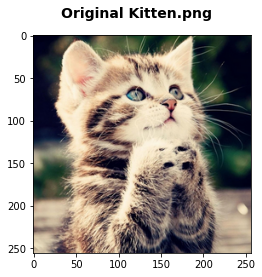

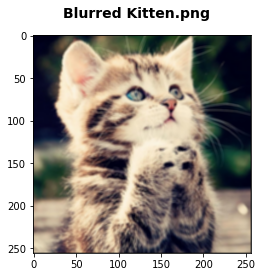

In [49]:
# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = np.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imageio.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel = gengaussian(3)
# Apply Convolution Here!
# print(kitten_origin.shape)
# print(kitten_blur.shape)
# print(kernel.shape)
for i in range(3):
    kitten_blur[:, :, i] = signal.convolve2d(kitten_origin[:, :, i], kernel, mode='same', boundary='fill', fillvalue=0)



# Display Results
fig_kitten_origin = plt.figure(1)
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
fig_kitten_blur = plt.figure(2)
fig_kitten_blur.suptitle('Blurred Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)
plt.show()

Increasing the value of sigma for the Guassian kernel increases the amount of blur. This is because a Guassian kernel conceptually is a weighted average of the surrounding pixels around a center pixel. A value n of sigma creates an nxn kernel which causes the filter to be applied to more neighboring pixels as n increases. This results in more blur since more pixels are being averaged. 